# Website Traffic Forecasting using Python

In [3]:
#Import datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

data = pd.read_csv("Thecleverprogrammer.csv")
print(data.head())


         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


The dataset contains two columns, date and traffic. Before moving forward, I will convert the Date column into Datetime data type

In [6]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")
data.head(3)

,Date,Views
0,2021-06-01,7831
1,2021-06-02,7798
2,2021-06-03,7401


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


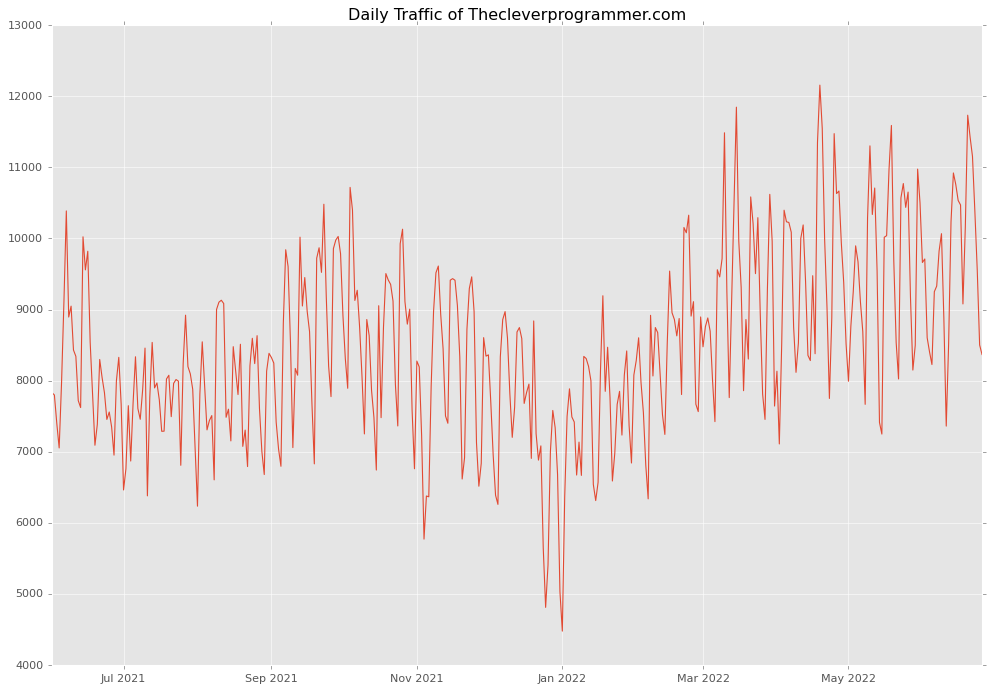

In [10]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()